# Arabic Articals NLP
By: Abeer Almdani & Sara Alrashidi

## Introduction
The goal of this project is to use Natural Language Processing and Unsupervised Learning models to categorize them into sections. After refining the approach. In this project, we will analyze the articles and categorize them into groups such as political, economic, medical, technological, scientific, sports and geographic articles.

## Data Description
dataset is provided by kaggle website, dataset contains titles and introductions that are arabic text and each artical has numeric unique index.

#### Size of Data:
* Number of rows: 294,838 rows
* Number of columns: 3 columns

## Importing libreries

In [173]:
import pandas as pd
import nltk
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt

import csv

# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import string
import pyarabic.araby as araby
import pyarabic.number as number
from pyarabic.araby import strip_tashkeel
from pyarabic.araby import strip_harakat
from pyarabic.araby import strip_tatweel
from pyarabic.araby import normalize_hamza
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import re
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF

###########################################################

import arabic_reshaper
from pyarabic.araby import tokenize
from pyarabic.unshape import unshaping_text
from pyarabic import araby
import matplotlib.pyplot as pPlot
#from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image
from matplotlib import pyplot as plt

#from ar_wordcloud import ArabicWordCloud
from corextopic import corextopic as ct
import nltk
from nltk.corpus import stopwords
%matplotlib inline
from nltk import corpus
import nltk.corpus as Corpus
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import gensim
from gensim import corpora, models, similarities, matutils
from gensim.models import basemodel, ldamodel

/Users/abeer/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


## Load Dataset

In [78]:
articals_df = pd.read_csv('out.csv')

## Clean Data

* Remove whitespace.
* Drop duplicates.
* Check null.
* Remove Unnecessary columns.
* Rename columns.

In [79]:
articals_df['artical'] = articals_df['title']+" "+articals_df['introductions'] #artical= title + introductions

In [80]:
# drop unnecessary columns
articals_df= articals_df.drop(['Unnamed: 0'], axis=1)
articals_df= articals_df.drop(['title'], axis=1)
articals_df= articals_df.drop(['introductions'], axis=1)
articals_df= articals_df.drop(['index'], axis=1)

In [81]:
articals_df.head(3)

,artical
0,المتحف العربي للفن الحديث و هو يعتبر متحف جديد...
1,فيلاجيو مول يعتبر فيلاجيو مول من أهم المجمعات ...
2,كورنيش الدوحة هو المنطقة البحرية الممتدة على م...


In [82]:
#Checking duplicates rows and drop.
articals_df.drop_duplicates(keep="first", inplace=True)
articals_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294836 entries, 0 to 294837
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   artical  294836 non-null  object
dtypes: object(1)
memory usage: 4.5+ MB


## Distribution of character length and token length overall

In [83]:
articals_df['char_length'] = articals_df['artical'].apply(lambda x : len(x))
articals_df['token_length'] = articals_df['artical'].apply(lambda x : len(x.split(" ")))

/Users/abeer/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/abeer/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


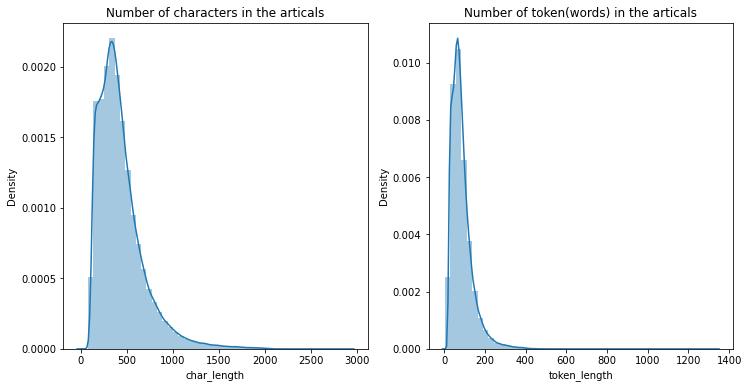

In [84]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.distplot(articals_df['char_length'], ax=ax1)
sns.distplot(articals_df['token_length'], ax=ax2)
ax1.set_title('Number of characters in the articals')
ax2.set_title('Number of token(words) in the articals')
plt.show()

## Preprocess the text
### Some basic Function to clean our Poem
- Remove english letters
- Remove harakat, tashkeel and tatweel
- Remove arabic and english punctuations
- Remove extra spaces
- Remove numbers
- Remove anything you see not related!

In [85]:
import pandas as pd
import re
import string
import sys
import argparse
import nltk
from nltk.corpus import stopwords

import pyarabic.araby as araby
import pyarabic.number as number
from pyarabic.araby import strip_tashkeel
from pyarabic.araby import strip_harakat
from pyarabic.araby import strip_tatweel
sw_nltk = stopwords.words('arabic')

In [86]:
new_articals_df = articals_df.loc[:4999, :]

articals = articals_df['artical']
articals_dataframe = pd.DataFrame(articals)

In [88]:
new_articals_df.head(2)

,artical,char_length,token_length
0,المتحف العربي للفن الحديث و هو يعتبر متحف جديد...,448,86
1,فيلاجيو مول يعتبر فيلاجيو مول من أهم المجمعات ...,488,94


In [89]:
new_articals_df.shape

(5000, 3)

In [90]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

In [92]:
arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

In [93]:
new_articals_df.head(2)

,artical,char_length,token_length
0,المتحف العربي للفن الحديث و هو يعتبر متحف جديد...,448,86
1,فيلاجيو مول يعتبر فيلاجيو مول من أهم المجمعات ...,488,94


In [94]:
# نوحد الحروف 
def normalize_arabic(text):
    #text = re.sub("[إأآا]", "ا", text)
    #text = re.sub("ى", "ي", text)
    #text = re.sub("ؤ", "ء", text)
    #text = re.sub("ئ", "ء", text)
    #text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

def remove_arabic_numbers(text):
    text = text.replace("٠", "")
    text = text.replace("١", "")
    text = text.replace("٢", "")
    text = text.replace("٣", "")
    text = text.replace("٤", "")
    text = text.replace("٥", "")
    text = text.replace("٦", "")
    text = text.replace("٧", "")
    text = text.replace("٨", "")
    text = text.replace("٩", "")
    return text

def remove_diacritics(text): 
    text = re.sub(arabic_diacritics, '', text)
    return text

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)


def remove_repeating_char(text):
    output = re.sub("وو", "و", text)
    output = re.sub("يي", "ي", output)
    output = re.sub("اا", "ا", output)
    return 
    
parser = argparse.ArgumentParser(description='Pre-process arabic text (remove '
                                             'diacritics, punctuations, and repeating '
                                             'characters).')

def removeNonArabicChar(text):
    return re.sub(r'[^0-9\u0600-\u06ff\u0750-\u077f\ufb50-\ufbc1\ufbd3-\ufd3f\ufd50-\ufd8f\ufd50-\ufd8f\ufe70-\ufefc\uFDF0-\uFDFD.0-9]+', ' ', text)


def removeUnnecessarySpaces(text):
    return re.sub(r'[\n\t\ ]+', ' ', text)

In [95]:
new_articals_df.head(2)

,artical,char_length,token_length
0,المتحف العربي للفن الحديث و هو يعتبر متحف جديد...,448,86
1,فيلاجيو مول يعتبر فيلاجيو مول من أهم المجمعات ...,488,94


In [252]:
column = new_articals_df.char_length
max_value = column.max()
min_value = column.min()
print(f'Max words number is {max_value} words ')
print(f'Min words number is {min_value} words ')

column = new_articals_df.token_length
max_value = column.max()
min_value = column.min()
print(f'Max token length is {max_value} tokens ')
print(f'Min token length is {min_value} tokens ')

Max words number is 1972 words 
Min words number is 116 words 
Max token length is 397 tokens 
Min token length is 19 tokens 


In [96]:
new_articals_df.artical = new_articals_df.artical.apply(lambda x: normalize_arabic(x)) 
new_articals_df.artical = new_articals_df.artical.apply(lambda x: remove_arabic_numbers(x))
new_articals_df.artical = new_articals_df.artical.apply(lambda x: remove_diacritics(x)) 
new_articals_df.artical = new_articals_df.artical.apply(lambda x: remove_punctuations(x)) 
new_articals_df.artical = new_articals_df.artical.apply(lambda x: remove_repeating_char(x)) 
new_articals_df.artical = new_articals_df.artical.apply(lambda x: removeNonArabicChar(x))
new_articals_df.artical = new_articals_df.artical.apply(lambda x: removeUnnecessarySpaces(x)) 

/Users/abeer/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [73]:
new_articals_df.head(2)

,artical,char_length,token_length
0,None,448,86
1,None,488,94


## Remove HAMZA, ALEF_MADDA, ALEF_HAMZA_ABOVE

In [302]:

arabic_pattern = re.compile("["
        u'\u060C' #COMMA 
        u'\u061B' #SEMICOLON  
        u'\u061F' #QUESTION
        u'\u0621' #HAMZA
        u'\u0622' #ALEF_MADDA
        u'\u0623' #ALEF_HAMZA_ABOVE
                           "]+", flags=re.UNICODE)


## Stop words removal

In [102]:
new_articals_df = pd.read_csv('/Users/abeer/Desktop/NLPArticals/cleandDataStemAndTokenize.csv')
new_articals_df

,artical,char_length,token_length
0,"['متحف', 'عرب', 'للفن', 'حديث', 'يعتبر', 'متحف...",448,86
1,"['يلاج', 'مول', 'يعتبر', 'يلاج', 'مول', 'اهم',...",488,94
2,"['كورنيش', 'دوح', 'منطق', 'بحر', 'ممتد', 'مجمو...",504,95
3,"['منتجع', 'شاطء', 'يلين', 'يعتبر', 'منتجع', 'ا...",317,60
4,"['منتجع', 'غار', 'منتجع', 'مطل', 'بحر', 'يحو',...",141,30
...,...,...,...
1045,"['غازا', 'بطن', 'غازا', 'بطن', 'جود', 'غازا', ...",588,115
1046,"['اسباب', 'غازا', 'بطن', 'تتعدد', 'اسباب', 'تك...",191,39
1047,"['اعراض', 'غازا', 'بطن', 'نسب', 'لمعظم', 'ناس'...",183,39
1048,"['وقا', 'علاج', 'غازا', 'بطن', 'هدف', 'علاج', ...",395,76


In [249]:
stpwrd = nltk.corpus.stopwords.words('arabic')
custom_stopwords= ['خلال','يمك','ان', 'اذا', 'الى', 'الا', 'او', 'وقد', 'وان', 'اذ',  'ولم', 'كنت', 'ال' , 'فما', 'وفي', 'منك','عديد'
                   'ابن','قلت', 'عني','كانما','عندي','فى','فانني','ءال','ءت','ءك','ئح','ئع','ئف','ئله','ائب','ائتلافا','ائتلاق','يى','يي','يياس','ييد','منهم','فعل','وكل'
                   ,'وليس','ولما','ابي', 'ابو', 'كابي', 'ولما','يكن','عني', 'عنك','يد','رايت','وكم' ,'عنك', 'ريب','تراه','ترى','واما','بكل', 'قلت', 'امسى', 'وذا', 'زال', 'امسى', 'طال'
                   ,'وبين', 'ادري', 'انت', 'ام', 'عنه', 'علي', 'اليه', 'مني', 'فقد', 'انا', 'اني', 'فيك'  ,  'يقال' ,' فانها', 'برحت' ,'اخو',' يجد' ,'ولكنه', 'وقال', 'يبدو',' ففي','فسقى', 'ينفذ', 'جان', 'حشاك', 'تحكم', 'انك', 'وثوب', 'بلواه','والترب',' يتلوه', 'شفت', 'غيركم', 'فارحم','ءا','ءاباوه','ءابصرت','ءات','ءاثارنا','ءاثرواحديث','ءاخر','ءادابه','ءادم','ءادمومنك','ييممها','ييمموا','ييمنه','ييمها','ييمهواين','ييميوم','يين','ييه','ييها','ييود' , 'مثلها', 'معا' ,'وانما' ,'للهوى' ,'يبت' ,'انك', 'تبيت', 'تعلمت' ,'تبيت', 'كتمت' ,'هملا','ءان','ءانسة','ءاي','ءايات','ءاية','ءايه','ءتنا','ءل','ءه','ءوا' ,'اليكم' ,'لديه' ,'ايضا', 'يقال','كانت', 'وهي',
                   'اي','عليها', 'اذ', 'فما', 'اين','بن','ابا', 'بني','اليك', 'بلا','ايها','اين', 'شيء', 'عن' 
                   'شئت', 'يك','وهل', 'فليس', 'بعدما','ئد' ,'فهي','ئل''يبت', 'يمس', 'امن', 'منا','بكر', 'بلي', 'لابن', 'عليهم', 'الان','فوقها','بغير','بيننا','منا','لابن', 'عليهم','اانت','ابائه','ابائي','ءة''ببب', 'لها', 'منها', 'ئل' ,'من', 'هو' , 'به', 'كن', 'كلا', 'الل', 'وعء'  , 'الذي' , 'متى', 'هذا','به','عناوكيف', 'سءت', 'ايم','ائمة','اانتم','اب','ابان','اباء', 'لكل' ,'افي','والا','فلما','عليكم','نال','ولكم','ولي','تكن','ئب','ئر','ئق','ئك','ئم','ئن','ئي','اء','ائتلاف','اباءه','ءة','اباح','و انما' ,'بان','شئت','ابدا','كانها','المرء','ءاذانهامست','ءاسه','ءاطام','ءافاقها','ءافن','ءالا','ءالاء','ءالاخوصا','ءالب','ءالله','ييقظ','ييك','ييكين','ييم','ييمم','ييممجلت','ييممفرد','ييمملقد','ييممله','ييممه','فالان' ,'اهل','كفى','مضى','اهل','جاء','صرف','الله','ارى','صرفه', 'خبا','اترى','اليها','واني','اما','قل','فكم','والا','انني', 'لقد', 'انه', 'كانه', 'فلم',  'وانت', 'ظل', 'لمن', 'فهو', 'قال', 'عنها', 'علينا', 'فاذا', 'فكيف'
]
stpwrd.extend(custom_stopwords)

def remove_arabic_stopword(text):
    words = [word for word in text.split() if word.lower() not in sw_nltk] ####### بدون شرط الاف
    new_text = " ".join(words)
    return new_text

new_articals_df.artical = new_articals_df.artical.apply(lambda x: remove_arabic_stopword(x))

In [108]:
new_articals_df.head(2)

,artical,char_length,token_length
0,"['متحف', 'عرب', 'للفن', 'حديث', 'يعتبر', 'متحف...",448,86
1,"['يلاج', 'مول', 'يعتبر', 'يلاج', 'مول', 'اهم',...",488,94


## Tokenization & stemming

In [281]:
# stem and tokenize words
import nltk
from nltk import word_tokenize
from snowballstemmer import stemmer
ar_stemmer = stemmer("arabic")


def tokenize_and_stem(text):
    tokens = [str(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = [str(token) for token in tokens]
    stems = [ar_stemmer.stemWord(t) for t in filtered_tokens if len(t) > 0]
    return stems


new_articals_df.artical = new_articals_df.artical.apply(lambda x: tokenize_and_stem(x))

In [110]:
new_articals_df.head(2)

,artical,char_length,token_length
0,"['متحف', 'عرب', 'للفن', 'حديث', 'يعتبر', 'متحف...",448,86
1,"['يلاج', 'مول', 'يعتبر', 'يلاج', 'مول', 'اهم',...",488,94


## CountVectorizer

In [148]:
import nltk
nltk.download('stopwords')
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
import re
import string

[nltk_data] Downloading package stopwords to /Users/abeer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [149]:
artical = cleand_data_df.artical
vectorizer = CountVectorizer()
doc_word = vectorizer.fit_transform(artical)
artical_vect= pd.DataFrame(doc_word.toarray(), index=artical, columns=vectorizer.get_feature_names())

In [150]:
artical_vect

,اب,ابا,اباء,اباح,ابار,ابتدء,ابتداء,ابتسام,ابتعاد,ابتكر,...,يوفيلما,يولد,يولوج,يوم,يومي,يون,يونان,يونسكو,يوهل,ڤيلهلم
artical,,,,,,,,,,,,,,,,,,,,,
متحف عرب للفن حديث يعتبر متحف جديد عهد يقدم مجموع عروض الفن تشكيل متنوع يظهر نان عرب معاصر تبرز ابداعا فريد يبرز الرء عرب الفن معاصر الفن حديث عالم لذل يعد ابرز متاحف عالم يجذب متحف سياح محل عالم يوهل لان معلم ياحي ثقافي طراز اول تعتبر زيار ضرور لكل سياح موجود مدين دوح,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
يلاج مول يعتبر يلاج مول مجمع تجار اشد جمال عالم عرب لان تم ناء تصميم هيء مدين بندق موجود ايطالي جعل امر شيق لكل افراد عايل سياح يحبون شراء مارك عالم يخص تصميم ازياء يشمل يلاج مول اما تسمح ركوب قوارب جندول رايع استخدام تنقل كامل مول نهر يجر وسط نها مطاف ينصح ذهاب مطاعم عالم رايع موجود,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
كورنيش دوح منطق بحر ممتد مجموع كيلومترا طول خليج دوح تطل كورنيش مجموع معالم مهم متحف الفن اسلام حديق رميل ندق شيرات موجود هيء هرم مجموع وزار هيء لجن اولمب قطر مجلس اعلي اتصال تكنولوجي معلوم باستطاع سياح فعل امور كورنيش شرب مشروب قهو الشا مشروب كرك عبار الشا احمر يضاف الي قليل حليب,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
منتجع شاطء يلين يعتبر منتجع اجمل اماك ساحل مطل بحر يحو سايل ترفيه راح شاليه وبر سباح مرافق خدم عام كاف انواع اما ممارس رياض بحر غير يتميز موقع منتج قرب عاصم يبعد عنه مساف ساع سيار,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
منتجع غار منتجع مطل بحر يحو اما تنزه يتميز وفر شقق سكن اسم تبع منطق موجود,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
غازا بطن غازا بطن جود غازا هواء داخل مجري قنا هضم سواء كان معد امعاء يشعر شخص مصاب بانتفاخ بطن الام تجعل صعب تحمل يضطر تخلص قسر سواء طريق تجشء طريق اخراج ريح ازداد اشخاص مصاب غازا بطن نتيج لازدياد ضغوط توتر حيا تناول اطعم الصح اطعم وجب سريع طبيعي يتم انتاج غاز طبيع امعاء ابتلاع هواء اثناء تناول طعام كلام يتم تخلص عاد شعور شخص لان معظم غاز بلا رايح,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
اسباب غازا بطن تتعدد اسباب غاز مفرط بطن فمن نتيج اعمال يوم يقوم ناس يدل امراض خطير الات اسباب غازا بطن,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
اعراض غازا بطن نسب لمعظم ناس يعتبر طبيع يمر غاز ريح مرة يوم علاما اعراض غاز الم غاز كله واضح جدا حيث تشمل,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [151]:
artical_vect.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1050 entries, متحف    عرب    للفن    حديث    يعتبر    متحف    جديد    عهد    يقدم    مجموع    عروض    الفن    تشكيل    متنوع    يظهر    نان    عرب    معاصر    تبرز    ابداعا    فريد      يبرز    الرء    عرب    الفن    معاصر    الفن    حديث    عالم    لذل    يعد    ابرز    متاحف    عالم    يجذب    متحف      سياح    محل    عالم    يوهل    لان      معلم    ياحي    ثقافي    طراز    اول    تعتبر    زيار    ضرور    لكل    سياح    موجود    مدين    دوح to صيد    اسماك    مصر    مصر    بلد    عرب    الغن    مصادر    سمك    سواء    تعيش    مياه    عذب    مياه    مالح    تم    انشاء      مشاريع    سمك      توفر    مياه    طول    مجري    نهر    نيل    قنا    سويس    تتم    ترب    انواع    محدد    اسماك    قصد    تصدير    خارج
Columns: 8319 entries, اب to ڤيلهلم
dtypes: int64(8319)
memory usage: 66.7+ MB


## TF-IDF Vectorizer

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer

data_list=cleand_data_df.artical.tolist()

tfidf = TfidfVectorizer()
v1 = tfidf.fit_transform(data_list)
artic_df = pd.DataFrame(v1.toarray(),columns=tfidf.get_feature_names())
artic_df

,اب,ابا,اباء,اباح,ابار,ابتدء,ابتداء,ابتسام,ابتعاد,ابتكر,...,يوفيلما,يولد,يولوج,يوم,يومي,يون,يونان,يونسكو,يوهل,ڤيلهلم
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.155339,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.117291,0.0,0.0,0.0,0.0,0.000000,0.0
1047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.129672,0.0,0.0,0.0,0.0,0.000000,0.0
1048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


## Data visualization

#### The Most Common words

In [254]:
# Most Used Words
count = pd.DataFrame(artic_df.sum()) # artic_df = TF-IDF Vectorizer
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
طريق,18.611316
علاج,15.534055
جسم,15.425522
بشر,15.257080
ماء,15.015648
زيت,13.401183
عام,13.044927
اعراض,12.822835
عمل,12.047188
شخص,11.723361


In [159]:
'''
import matplotlib as mpl
awc = ArabicWordCloud(background_color="white",)

mpl.rcParams['figure.figsize']=(18,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 

# wordcloud = awc.generate(str(tfidf.get_feature_names())).from_text(
#     str(tfidf.get_feature_names()))

wordcloud = awc.generate(str(CountVector.get_feature_names())).from_text(str(CountVector.get_feature_names()))
#wordcloud = WordCloud(background_color='white', max_words=5000, contour_width=3, contour_color='steelblue', width=800, height=400)

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(colormap='Dark2'),interpolation='bilinear')
#plt.title("Word Cloud of all the words")
plt.axis('off')
plt.savefig("arabicpoem.png",transparent=True,  bbox_inches="tight")

plt.show();
'''

'\nimport matplotlib as mpl\nawc = ArabicWordCloud(background_color="white",)\n\nmpl.rcParams[\'figure.figsize\']=(18,12.0)  \nmpl.rcParams[\'font.size\']=12            \nmpl.rcParams[\'savefig.dpi\']=100             \nmpl.rcParams[\'figure.subplot.bottom\']=.1 \n\n# wordcloud = awc.generate(str(tfidf.get_feature_names())).from_text(\n#     str(tfidf.get_feature_names()))\n\nwordcloud = awc.generate(str(CountVector.get_feature_names())).from_text(str(CountVector.get_feature_names()))\n#wordcloud = WordCloud(background_color=\'white\', max_words=5000, contour_width=3, contour_color=\'steelblue\', width=800, height=400)\n\nprint(wordcloud)\nfig = plt.figure(1)\nplt.imshow(wordcloud.recolor(colormap=\'Dark2\'),interpolation=\'bilinear\')\n#plt.title("Word Cloud of all the words")\nplt.axis(\'off\')\nplt.savefig("arabicpoem.png",transparent=True,  bbox_inches="tight")\n\nplt.show();\n'

In [163]:
'''
#Function to Create Wordcloud
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(18,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
def create_wordcloud(text):
    #mask = np.array(Image.open("cloud.png"))
    
    stopwords = set(stpwrd)
    wc = ArabicWordCloud(background_color="white",
                  
                  max_words=3000,
                  stopwords=stpwrd,
                  repeat=True)
    wc.generate(str(text)).from_text(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))
    '''

In [165]:
#create_wordcloud(cleand_data_df["artical"][:1000].values)

## ngram

In [166]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = stpwrd).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [167]:
n2_bigrams = get_top_n_gram(cleand_data_df.artical,(2,2),20)
n2_bigrams

/Users/abeer/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'انفك', 'انما', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظن', 'عد', 'فانها', 'ففي', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء', 'يتلوه', 'يجد'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


[('زيت زيت', 28),
 ('درج حرار', 27),
 ('احجار كريم', 24),
 ('حمي تيفويد', 24),
 ('دور دمو', 23),
 ('جسم انس', 23),
 ('طريق تحضير', 22),
 ('عناصر غذاء', 22),
 ('مجال كهرباء', 22),
 ('درجا حرار', 21),
 ('جدير ذكر', 21),
 ('احتباس حرار', 21),
 ('جهاز عصب', 21),
 ('تهاب كبد', 21),
 ('جهاز هضم', 20),
 ('الدم بيضاء', 20),
 ('نظام غذاء', 19),
 ('ماء دافء', 19),
 ('سعر حرار', 19),
 ('سرطان الثد', 19)]

In [169]:
#n3_trigram
n3_trigrams = get_top_n_gram(cleand_data_df.artical,(3,3),20)
n3_trigrams

[('زيت جوز هند', 12),
 ('ممارس تمار رياض', 11),
 ('كريا الدم بيضاء', 11),
 ('اصاب حمي تيفويد', 11),
 ('بحر ابيض متوسط', 10),
 ('مملك عرب سعود', 10),
 ('عوز مناع بشر', 10),
 ('تهاب كبد فيروس', 10),
 ('خلاي الدم بيضاء', 9),
 ('عبد حليم حافظ', 9),
 ('رسول صلي سلم', 7),
 ('تبول اللا اراد', 7),
 ('يروس عوز مناع', 7),
 ('دور دمو كبري', 6),
 ('ظاهر احتباس حرار', 6),
 ('نقص صفايح دمو', 6),
 ('اتباع نظام غذاء', 6),
 ('خطوط مجال كهرباء', 6),
 ('مجال كهرباء منتظم', 6),
 ('صبغ شعر اثناء', 6)]

# Topic Modeling

## - Latent Dirichlet Allocation (LDA) - CountVectorizer¶

In [178]:
corpus = matutils.Sparse2Corpus(doc_word) 
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())
lda = models.LdaModel(corpus=corpus, num_topics=5, id2word=id2word, passes=5)
lda.print_topics()

[(0,
  '0.021*"اثمار" + 0.019*"ارخبيل" + 0.014*"اختيار" + 0.012*"افلاتوكس" + 0.012*"احماض" + 0.011*"اسد" + 0.010*"اكاد" + 0.010*"احتياج" + 0.009*"السم" + 0.009*"اخصب"'),
 (1,
  '0.023*"ابي" + 0.022*"استر" + 0.017*"اجهاد" + 0.013*"اعدادا" + 0.013*"اعدام" + 0.013*"اتفق" + 0.012*"اطاح" + 0.012*"البد" + 0.011*"ابتلاع" + 0.011*"اطار"'),
 (2,
  '0.011*"احواض" + 0.011*"ارجوان" + 0.010*"استطيع" + 0.010*"اسلاك" + 0.010*"اخشاب" + 0.009*"استجمام" + 0.009*"استغفار" + 0.009*"احتل" + 0.009*"اراء" + 0.009*"اخف"'),
 (3,
  '0.008*"اتاتور" + 0.007*"انبعاثا" + 0.007*"الذك" + 0.007*"الشر" + 0.007*"ابواه" + 0.006*"ابهام" + 0.006*"اربعمء" + 0.006*"المان" + 0.006*"اختلافا" + 0.006*"اكمال"'),
 (4,
  '0.016*"ابسط" + 0.015*"احرج" + 0.015*"ارجنت" + 0.013*"اقتناع" + 0.011*"احكام" + 0.011*"اشطف" + 0.010*"اعتدال" + 0.010*"ابدع" + 0.009*"الات" + 0.009*"اب"')]

In [181]:
for topic in lda.show_topics(num_topics=5, formatted=False, num_words=12):
    print("Topic {}: ".format(topic[0]))
    topicwords = [w for (w, val) in topic[1]]
    print(topicwords)

Topic 0: 
['اثمار', 'ارخبيل', 'اختيار', 'افلاتوكس', 'احماض', 'اسد', 'اكاد', 'احتياج', 'السم', 'اخصب', 'اجمل', 'املج']
Topic 1: 
['ابي', 'استر', 'اجهاد', 'اعدادا', 'اعدام', 'اتفق', 'اطاح', 'البد', 'ابتلاع', 'اطار', 'استراتيجيا', 'اختبارا']
Topic 2: 
['احواض', 'ارجوان', 'استطيع', 'اسلاك', 'اخشاب', 'استجمام', 'استغفار', 'احتل', 'اراء', 'اخف', 'اقدم', 'استغرق']
Topic 3: 
['اتاتور', 'انبعاثا', 'الذك', 'الشر', 'ابواه', 'ابهام', 'اربعمء', 'المان', 'اختلافا', 'اكمال', 'احتض', 'الدخ']
Topic 4: 
['ابسط', 'احرج', 'ارجنت', 'اقتناع', 'احكام', 'اشطف', 'اعتدال', 'ابدع', 'الات', 'اب', 'اقتصار', 'احفور']


## - Latent Dirichlet Allocation (LDA) - TF-IDF

In [182]:
corpus = matutils.Sparse2Corpus(v1)
id2word = dict((v, k) for k, v in tfidf.vocabulary_.items())

In [184]:
len(id2word)

8319

In [186]:
lda = models.LdaModel(corpus=corpus, num_topics=5, id2word=id2word, passes=5)
lda.print_topics()

[(0,
  '0.006*"ارجنت" + 0.004*"اسهال" + 0.004*"اخر" + 0.004*"اسماك" + 0.003*"استاذ" + 0.003*"الخد" + 0.003*"اشرب" + 0.003*"استروج" + 0.003*"الفق" + 0.003*"اصرار"'),
 (1,
  '0.005*"ارخبيل" + 0.004*"ابهام" + 0.004*"السو" + 0.003*"اسطح" + 0.003*"اجنح" + 0.003*"اصيب" + 0.003*"افلاتوكس" + 0.003*"الشا" + 0.003*"ادعي" + 0.002*"ابعد"'),
 (2,
  '0.006*"ارجوان" + 0.004*"اصاب" + 0.002*"السم" + 0.002*"امكان" + 0.002*"ابه" + 0.001*"اجل" + 0.001*"ازياء" + 0.001*"اختراق" + 0.001*"امدادا" + 0.001*"اداب"'),
 (3,
  '0.004*"اسلاك" + 0.004*"اقلام" + 0.004*"اقل" + 0.003*"اطوار" + 0.003*"اب" + 0.003*"امزج" + 0.003*"اتفاقيا" + 0.003*"اتفاق" + 0.003*"اسكندر" + 0.003*"اسكتلند"'),
 (4,
  '0.003*"اسد" + 0.002*"اخشاب" + 0.002*"الذك" + 0.002*"اجهاد" + 0.002*"الجن" + 0.002*"اراء" + 0.002*"اقدم" + 0.002*"اعدادا" + 0.002*"افة" + 0.002*"انبعاثا"')]

In [188]:
for topic in lda.show_topics(num_topics=5, formatted=False, num_words=12):
    print("Topic {}: ".format(topic[0]))
    topicwords = [w for (w, val) in topic[1]]
    print(topicwords)

Topic 0: 
['ارجنت', 'اسهال', 'اخر', 'اسماك', 'استاذ', 'الخد', 'اشرب', 'استروج', 'الفق', 'اصرار', 'اشكال', 'اشقاء']
Topic 1: 
['ارخبيل', 'ابهام', 'السو', 'اسطح', 'اجنح', 'اصيب', 'افلاتوكس', 'الشا', 'ادعي', 'ابعد', 'اتاتور', 'اتخاذ']
Topic 2: 
['ارجوان', 'اصاب', 'السم', 'امكان', 'ابه', 'اجل', 'ازياء', 'اختراق', 'امدادا', 'اداب', 'استخدام', 'استحواذ']
Topic 3: 
['اسلاك', 'اقلام', 'اقل', 'اطوار', 'اب', 'امزج', 'اتفاقيا', 'اتفاق', 'اسكندر', 'اسكتلند', 'الات', 'اكزيم']
Topic 4: 
['اسد', 'اخشاب', 'الذك', 'اجهاد', 'الجن', 'اراء', 'اقدم', 'اعدادا', 'افة', 'انبعاثا', 'الحل', 'ابا']


## - Latent Semantic Analysis (LSA) - CountVectorizer

In [190]:
lsa = TruncatedSVD(5)
doc_topic = lsa.fit_transform(doc_word)
lsa.explained_variance_ratio_

array([0.01123053, 0.01987726, 0.01560519, 0.01274738, 0.01046873])

In [191]:
lsa = TruncatedSVD(5)
doc_topic

array([[ 1.3182225 , -1.34066722, -1.35925842,  0.1526206 , -0.06328953],
       [ 1.17249695, -0.90084697, -0.82313173,  0.15249536, -0.23452408],
       [ 0.7719456 , -0.64552109, -0.52952034,  0.12073506, -0.26378702],
       ...,
       [ 0.70687189, -0.27390275,  0.48413123, -0.21441765,  0.06372329],
       [ 1.9876982 , -0.73998181,  2.83408151,  0.41311609,  2.77188678],
       [ 0.50391781, -0.41763511, -0.17370449,  0.05239734, -0.24740966]])

In [193]:
doc_topic = lsa.fit_transform(doc_word)
lsa.explained_variance_ratio_

array([0.01123018, 0.019877  , 0.0156032 , 0.01273395, 0.01048106])

In [195]:
topic_word = pd.DataFrame(lsa.components_.round(3), # 10 for dec pts
             index = ["topic_1","topic_2","topic_3","topic_4","topic_5"],
             columns = vectorizer.get_feature_names()) # notes is vectoriser only 
topic_word

,اب,ابا,اباء,اباح,ابار,ابتدء,ابتداء,ابتسام,ابتعاد,ابتكر,...,يوفيلما,يولد,يولوج,يوم,يومي,يون,يونان,يونسكو,يوهل,ڤيلهلم
topic_1,0.002,0.001,0.001,0.002,0.000,0.002,0.005,0.001,0.003,0.001,...,0.0,0.002,0.001,0.069,0.010,0.005,0.003,0.001,0.001,0.001
topic_2,-0.002,-0.001,-0.001,0.002,-0.001,-0.003,-0.007,-0.000,-0.001,-0.001,...,-0.0,-0.003,-0.001,-0.047,-0.004,-0.007,-0.004,-0.002,-0.001,-0.002
topic_3,-0.001,-0.000,0.001,-0.001,-0.001,-0.004,-0.008,0.000,0.003,-0.001,...,0.0,0.000,-0.000,0.016,0.012,-0.010,-0.005,-0.004,-0.001,-0.004
topic_4,-0.001,-0.001,-0.001,-0.000,0.000,0.001,-0.001,-0.000,-0.002,-0.000,...,-0.0,-0.001,0.001,-0.062,-0.009,0.001,0.001,0.001,0.000,0.000
topic_5,-0.000,-0.000,0.001,0.001,0.000,0.003,0.010,-0.000,-0.000,0.000,...,0.0,-0.004,-0.001,-0.025,-0.021,0.002,0.002,-0.001,0.000,0.002


In [196]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))  

In [200]:
display_topics(lsa, vectorizer.get_feature_names(), 15)


Topic  0
شعر, عام, جسم, علاج, طريق, طبيع, استخدام, ماء, عمل, عالم, دول, زيت, انجليز, يتم, شخص

Topic  1
شعر, زيت, صبغ, نمو, استخدام, عنا, بيض, ثوم, صبغا, مواد, صيلا, طبيع, زيوت, كثاف, جاف

Topic  2
علاج, جسم, كريم, احجار, الدم, اصاب, ماء, اعراض, حال, طريق, جهاز, مرض, يتم, شخص, كبد

Topic  3
كريم, احجار, معاد, لولء, علاج, ماد, منطق, داخل, اشع, تركيب, محار, يوجد, انواع, اخري, تدخل

Topic  4
علاج, اعراض, عام, قصر, اصاب, كبد, سرط, مرض, حال, سرطان, شعر, الثد, سلط, عبد, مرحل


## - Latent Semantic Analysis (LSA) - TF-IDF

In [201]:
lsa = TruncatedSVD(5)
doc_topic = lsa.fit_transform(v1)
lsa.explained_variance_ratio_

array([0.00519043, 0.00936602, 0.00846212, 0.00793274, 0.00634038])

In [202]:
lsa = TruncatedSVD(5)
doc_topic

array([[ 0.07822683, -0.0880609 ,  0.16484794, -0.04090601,  0.03539853],
       [ 0.06095378, -0.0520065 ,  0.09586905, -0.01615961,  0.01372669],
       [ 0.0720695 , -0.06283075,  0.1037328 ,  0.00668028,  0.02116108],
       ...,
       [ 0.11670095, -0.12151509, -0.09821566, -0.0854933 ,  0.0323605 ],
       [ 0.19128178, -0.16434941, -0.18015942, -0.08257234, -0.00510358],
       [ 0.05491448, -0.05635905,  0.06494457,  0.00294397, -0.00746506]])

In [203]:
# Transform the doc-term matrix to doc-topic matrix
doc_topic = lsa.fit_transform(v1)
lsa.explained_variance_ratio_

array([0.00519041, 0.00936625, 0.0084622 , 0.00793188, 0.0063326 ])

In [204]:
# Getting the U-matrix in Decomposition
topic_word = pd.DataFrame(lsa.components_.round(3), # 10 for dec pts
             index = ["topic_1","topic_2","topic_3","topic_4","topic_5"],
             columns = tfidf.get_feature_names()) # notes is vectoriser only 
topic_word

,اب,ابا,اباء,اباح,ابار,ابتدء,ابتداء,ابتسام,ابتعاد,ابتكر,...,يوفيلما,يولد,يولوج,يوم,يومي,يون,يونان,يونسكو,يوهل,ڤيلهلم
topic_1,0.001,0.001,0.001,0.002,0.000,0.000,0.002,0.001,0.007,0.001,...,0.001,0.003,0.001,0.053,0.015,0.003,0.002,0.001,0.001,0.000
topic_2,-0.001,-0.001,-0.002,0.002,-0.001,-0.001,-0.003,-0.001,-0.005,-0.001,...,-0.001,-0.004,-0.001,-0.049,-0.011,-0.006,-0.003,-0.003,-0.001,-0.000
topic_3,0.001,0.001,-0.001,0.000,0.001,0.001,0.004,0.000,-0.001,0.001,...,-0.000,0.003,0.002,-0.001,0.000,0.013,0.005,0.008,0.003,0.001
topic_4,-0.000,-0.000,-0.002,-0.002,-0.000,-0.000,-0.001,-0.000,0.010,0.000,...,-0.000,-0.000,-0.001,0.021,0.019,-0.005,-0.002,-0.002,-0.001,-0.000
topic_5,-0.001,-0.001,-0.000,-0.001,0.000,0.000,-0.001,-0.002,-0.000,-0.002,...,0.000,-0.007,0.001,-0.065,-0.025,0.007,0.001,0.005,0.001,0.000


- Top 15 key words for each of the 12 topics

In [205]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:

            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [207]:
display_topics(lsa, tfidf.get_feature_names(), 15)


Topic  0
شعر, زيت, طريق, ماء, بشر, جسم, علاج, طبيع, اعراض, استخدام, طرق, يتم, مواد, اصاب, نمو

Topic  1
شعر, زيت, عنا, صبغ, نمو, ثوم, حناء, تجعيد, خلط, بيض, نصايح, زيوت, دهن, تساقط, مجعد

Topic  2
مدين, دول, جزير, عرب, عام, تقع, جنوب, جزر, بحر, عالم, شمال, امريك, سياح, شرق, مساح

Topic  3
زيت, ماء, بشر, طريق, مكون, لمد, ورد, عسل, دافء, يساعد, وصف, غسل, تخلط, تتر, تغسل

Topic  4
زيت, اعراض, كبد, بشر, مدين, جزير, دول, فيروس, تقع, اصاب, جنوب, شمال, تهاب, جزر, لمد


In [210]:
Vt = pd.DataFrame(doc_topic.round(4),
             index = cleand_data_df.artical,
             columns = ["topic_1","topic_2","topic_3","topic_4","topic_5"])
Vt

,topic_1,topic_2,topic_3,topic_4,topic_5
artical,,,,,
متحف عرب للفن حديث يعتبر متحف جديد عهد يقدم مجموع عروض الفن تشكيل متنوع يظهر نان عرب معاصر تبرز ابداعا فريد يبرز الرء عرب الفن معاصر الفن حديث عالم لذل يعد ابرز متاحف عالم يجذب متحف سياح محل عالم يوهل لان معلم ياحي ثقافي طراز اول تعتبر زيار ضرور لكل سياح موجود مدين دوح,0.0782,-0.0882,0.1655,-0.0446,0.0310
يلاج مول يعتبر يلاج مول مجمع تجار اشد جمال عالم عرب لان تم ناء تصميم هيء مدين بندق موجود ايطالي جعل امر شيق لكل افراد عايل سياح يحبون شراء مارك عالم يخص تصميم ازياء يشمل يلاج مول اما تسمح ركوب قوارب جندول رايع استخدام تنقل كامل مول نهر يجر وسط نها مطاف ينصح ذهاب مطاعم عالم رايع موجود,0.0609,-0.0520,0.0962,-0.0175,0.0113
كورنيش دوح منطق بحر ممتد مجموع كيلومترا طول خليج دوح تطل كورنيش مجموع معالم مهم متحف الفن اسلام حديق رميل ندق شيرات موجود هيء هرم مجموع وزار هيء لجن اولمب قطر مجلس اعلي اتصال تكنولوجي معلوم باستطاع سياح فعل امور كورنيش شرب مشروب قهو الشا مشروب كرك عبار الشا احمر يضاف الي قليل حليب,0.0721,-0.0631,0.1048,0.0056,0.0166
منتجع شاطء يلين يعتبر منتجع اجمل اماك ساحل مطل بحر يحو سايل ترفيه راح شاليه وبر سباح مرافق خدم عام كاف انواع اما ممارس رياض بحر غير يتميز موقع منتج قرب عاصم يبعد عنه مساف ساع سيار,0.0753,-0.0763,0.1209,-0.0167,0.0080
منتجع غار منتجع مطل بحر يحو اما تنزه يتميز وفر شقق سكن اسم تبع منطق موجود,0.0327,-0.0388,0.0752,-0.0137,0.0268
...,...,...,...,...,...
غازا بطن غازا بطن جود غازا هواء داخل مجري قنا هضم سواء كان معد امعاء يشعر شخص مصاب بانتفاخ بطن الام تجعل صعب تحمل يضطر تخلص قسر سواء طريق تجشء طريق اخراج ريح ازداد اشخاص مصاب غازا بطن نتيج لازدياد ضغوط توتر حيا تناول اطعم الصح اطعم وجب سريع طبيعي يتم انتاج غاز طبيع امعاء ابتلاع هواء اثناء تناول طعام كلام يتم تخلص عاد شعور شخص لان معظم غاز بلا رايح,0.1520,-0.1081,-0.0427,0.0232,-0.1183
اسباب غازا بطن تتعدد اسباب غاز مفرط بطن فمن نتيج اعمال يوم يقوم ناس يدل امراض خطير الات اسباب غازا بطن,0.0760,-0.0550,-0.0347,-0.0188,-0.0547
اعراض غازا بطن نسب لمعظم ناس يعتبر طبيع يمر غاز ريح مرة يوم علاما اعراض غاز الم غاز كله واضح جدا حيث تشمل,0.1167,-0.1217,-0.0996,-0.0833,0.0394


In [211]:
cosine_similarity((doc_topic[0], doc_topic[12])).round()

array([[1., 1.],
       [1., 1.]])

Since the LSA model did not perform well, we can see that some topics are mixed with each other, let's see CorEx and NMF models.

## CorEx Topic Modeling

In [215]:
from nltk import word_tokenize
from nltk.stem.isri import ISRIStemmer

st = ISRIStemmer()
word_list = str(cleand_data_df.artical)
wordsfilter=[]
# Define a function
def filterr(word_list):
    
    for a in word_tokenize(word_list):
        stem = st.stem(a)
        wordsfilter.append(stem)
    return wordsfilter

In [216]:
# Call the function
filterr(word_list)

['0',
 'تحف',
 'عرب',
 'للف',
 'حدث',
 'عبر',
 'تحف',
 '...',
 '1',
 'يلج',
 'مول',
 'عبر',
 'يلج',
 'مول',
 'جمع',
 '...',
 '2',
 'كورنيش',
 'دوح',
 'نطق',
 'بحر',
 'متد',
 'جمع',
 '...',
 '3',
 'نجع',
 'شطء',
 'يلن',
 'عبر',
 'نجع',
 'اجم',
 '...',
 '4',
 'نجع',
 'غار',
 'نجع',
 'مطل',
 'بحر',
 'يحو',
 '...',
 '...',
 '1045',
 'غزا',
 'بطن',
 'غزا',
 'بطن',
 'جود',
 'غزا',
 'ه',
 '...',
 '1046',
 'سبب',
 'غزا',
 'بطن',
 'عدد',
 'سبب',
 'غا',
 '...',
 '1047',
 'عرض',
 'غزا',
 'بطن',
 'نسب',
 'عظم',
 'ناس',
 '...',
 '1048',
 'وقا',
 'علج',
 'غزا',
 'بطن',
 'هدف',
 'علج',
 'غ',
 '...',
 '1049',
 'صيد',
 'سمك',
 'مصر',
 'مصر',
 'بلد',
 'عرب',
 'ال',
 '...',
 'Name',
 ':',
 'artical',
 ',',
 'Length',
 ':',
 '1050',
 ',',
 'dtype',
 ':',
 'object']

In [217]:
vectorizer = CountVectorizer(max_features= 8000,
                             stop_words=stpwrd, 
                             binary=True)

doc_word = vectorizer.fit_transform(cleand_data_df.artical)
words = list(np.asarray(vectorizer.get_feature_names()))

/Users/abeer/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'انفك', 'انما', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظن', 'عد', 'فانها', 'ففي', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء', 'يتلوه', 'يجد'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [218]:
topic_model = ct.Corex(n_hidden=5, words=words, seed=1)
topic_model.fit(doc_word, words=words, docs=wordsfilter)

In [219]:
topics = topic_model.get_topics()
topics

[[('مدين', 0.11164974972617177, 1.0),
  ('دول', 0.09086617005086191, 1.0),
  ('عام', 0.07171323247233054, 1.0),
  ('جزير', 0.06934140466168837, 1.0),
  ('عرب', 0.06836034397248197, 1.0),
  ('تقع', 0.06231106208407115, 1.0),
  ('تاريخ', 0.05276415580254516, 1.0),
  ('شرق', 0.05259141170956748, 1.0),
  ('جنوب', 0.05244939579180787, 1.0),
  ('سكان', 0.05012932300883488, 1.0)],
 [('محل', 0.022127850997584173, 1.0),
  ('مطبخ', 0.012393701422650588, 1.0),
  ('الي', 0.012364465159998549, 1.0),
  ('تاسيس', 0.01139619821346972, 1.0),
  ('كلام', 0.01139619821346972, 1.0),
  ('عيش', 0.01139619821346972, 1.0),
  ('قوم', 0.009690512239163354, 1.0),
  ('مدرس', 0.009648536953123137, 1.0),
  ('جمع', 0.008278281081453292, 1.0),
  ('سلط', 0.008188696735561373, 1.0)],
 [('باب', 0.018096557367096405, 1.0),
  ('حجم', 0.017331693409505203, 1.0),
  ('المك', 0.01639208272554908, 1.0),
  ('استطيع', 0.015462604849247512, 1.0),
  ('ناء', 0.01426784275795784, 1.0),
  ('شايع', 0.012992968389316415, 1.0),
  ('فيزيا

The CorEx model did not produce sensible topics, let's see how NMF model performs.

## NMF - CountVectorizer

In [227]:
nmf_model = NMF(5)
doc_topic1 = nmf_model.fit_transform(doc_word)
nmf_features = nmf_model.transform(doc_word)

/Users/abeer/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/abeer/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [230]:
nmf_topic= display_topics(nmf_model, vectorizer.get_feature_names(), 12)

#topic 0: History
#topic 1: Geography
#topic 2: Food
#topic 3: Medicine
#topic 4: Health and Beauty


Topic  0
عام, عمل, عالم, شخص, حيا, تم, تاريخ, فتر, بدء, عمر, يوم, خاص

Topic  1
مدين, دول, تقع, جنوب, تعتبر, مساح, بحر, شرق, عرب, جزير, سكان, غرب

Topic  2
جسم, غذاء, تناول, انس, الصح, طبيع, انواع, حرار, يعتبر, لذل, مواد, لان

Topic  3
اصاب, حال, علاج, اعراض, مرض, مصاب, شخص, عدوي, فيروس, جهاز, الدم, تظهر

Topic  4
طريق, ماء, يتم, استخدام, بشر, شعر, لمد, مكون, زيت, وصف, غسل, حصول


### Results

> We can notice that topics are:
    >> Topic 0: تاريخ\
    >> Topic 1: جغرافيا\
    >> Topic 2: الغذاء والطعام\
    >> Topic 3: الطب\
    >> Topic 4: الصحة والجمال
    

### Recommended Articals

In [304]:
cleand_data_df = pd.read_csv('/Users/abeer/Desktop/NLPArticals/withoutNoiseWord.csv')
original_data_df = pd.read_csv('/Users/abeer/Desktop/NLPArticals/out.csv')
cleand_data_df.head(2)

,artical,char_length,token_length,artical_without_stopwords
0,متحف عرب للفن حديث يعتبر متحف...,448,86,"['متحف', 'عرب', 'للفن', 'حديث', 'يعتبر', 'متحف..."
1,يلاج مول يعتبر يلاج مول مجم...,488,94,"['يلاج', 'مول', 'يعتبر', 'يلاج', 'مول', 'اهم',..."


In [305]:
new_artical_to_recommed = cleand_data_df.artical[1049]
new_artical_to_recommed

'  صيد    اسماك    مصر    مصر    بلد    عرب    الغن    مصادر    سمك    سواء    تعيش    مياه    عذب    مياه    مالح    تم    انشاء      مشاريع    سمك      توفر    مياه    طول    مجري    نهر    نيل    قنا    سويس    تتم    ترب    انواع    محدد    اسماك    قصد    تصدير    خارج  '

In [306]:
print (f'{original_data_df.title[1049]}  \n \n {original_data_df.introductions[1049]}')

صيد الأسماك في مصر  
 
 مصر من البلدان العربية الغنية بمصادرها السمكية سواء التي تعيش في المياه العذبة أو بالمياه المالحة ، و قد تم إنشاء الكثير من المشاريع السمكية بسبب توفر المياه على طول مجرى نهر النيل و قناة السويس ، حيث تتم تربية أنواع محددة من الأسماك بقصد تصديرها إلى الخارج .


In [284]:
Vt = pd.DataFrame(doc_topic.round(5),
             index = artical,
             columns =["topic_1","topic_2","topic_3","topic_4","topic_5"])              
Vt.head(2)     

,topic_1,topic_2,topic_3,topic_4,topic_5
artical,,,,,
متحف عرب للفن حديث يعتبر متحف جديد عهد يقدم مجموع عروض الفن تشكيل متنوع يظهر نان عرب معاصر تبرز ابداعا فريد يبرز الرء عرب الفن معاصر الفن حديث عالم لذل يعد ابرز متاحف عالم يجذب متحف سياح محل عالم يوهل لان معلم ياحي ثقافي طراز اول تعتبر زيار ضرور لكل سياح موجود مدين دوح,0.07821,-0.08823,0.16550,-0.04459,0.03095
يلاج مول يعتبر يلاج مول مجمع تجار اشد جمال عالم عرب لان تم ناء تصميم هيء مدين بندق موجود ايطالي جعل امر شيق لكل افراد عايل سياح يحبون شراء مارك عالم يخص تصميم ازياء يشمل يلاج مول اما تسمح ركوب قوارب جندول رايع استخدام تنقل كامل مول نهر يجر وسط نها مطاف ينصح ذهاب مطاعم عالم رايع موجود,0.06093,-0.05198,0.09622,-0.01751,0.01131


In [285]:
cosine_similarity((doc_topic[0], doc_topic[1],doc_topic[2],doc_topic[3],doc_topic[4])).round()

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [286]:
topics = Vt.copy()
topics.head(2)

,topic_1,topic_2,topic_3,topic_4,topic_5
artical,,,,,
متحف عرب للفن حديث يعتبر متحف جديد عهد يقدم مجموع عروض الفن تشكيل متنوع يظهر نان عرب معاصر تبرز ابداعا فريد يبرز الرء عرب الفن معاصر الفن حديث عالم لذل يعد ابرز متاحف عالم يجذب متحف سياح محل عالم يوهل لان معلم ياحي ثقافي طراز اول تعتبر زيار ضرور لكل سياح موجود مدين دوح,0.07821,-0.08823,0.16550,-0.04459,0.03095
يلاج مول يعتبر يلاج مول مجمع تجار اشد جمال عالم عرب لان تم ناء تصميم هيء مدين بندق موجود ايطالي جعل امر شيق لكل افراد عايل سياح يحبون شراء مارك عالم يخص تصميم ازياء يشمل يلاج مول اما تسمح ركوب قوارب جندول رايع استخدام تنقل كامل مول نهر يجر وسط نها مطاف ينصح ذهاب مطاعم عالم رايع موجود,0.06093,-0.05198,0.09622,-0.01751,0.01131


In [287]:
topics['topic_#'] = 0
topics['max_rate'] = 0.0

In [288]:
topics.head(2)

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_#,max_rate
artical,,,,,,,
متحف عرب للفن حديث يعتبر متحف جديد عهد يقدم مجموع عروض الفن تشكيل متنوع يظهر نان عرب معاصر تبرز ابداعا فريد يبرز الرء عرب الفن معاصر الفن حديث عالم لذل يعد ابرز متاحف عالم يجذب متحف سياح محل عالم يوهل لان معلم ياحي ثقافي طراز اول تعتبر زيار ضرور لكل سياح موجود مدين دوح,0.07821,-0.08823,0.16550,-0.04459,0.03095,0,0.0
يلاج مول يعتبر يلاج مول مجمع تجار اشد جمال عالم عرب لان تم ناء تصميم هيء مدين بندق موجود ايطالي جعل امر شيق لكل افراد عايل سياح يحبون شراء مارك عالم يخص تصميم ازياء يشمل يلاج مول اما تسمح ركوب قوارب جندول رايع استخدام تنقل كامل مول نهر يجر وسط نها مطاف ينصح ذهاب مطاعم عالم رايع موجود,0.06093,-0.05198,0.09622,-0.01751,0.01131,0,0.0


In [289]:
for i in range(0, len(Vt)):
    all_topics_rate = Vt.iloc[i].to_numpy()  # تجيب كل الارقام اللي بالصف 
    max_value = max(all_topics_rate)
    all_topics_rate = list(all_topics_rate) # to list to find index
    index = all_topics_rate.index(max_value)
    
    try:
        topics['topic_#'][i] = (index+1)
        topics['max_rate'][i] = (max_value)
        
    except: print(f'error {i}')
    #topics['top'][i] = index+1 
    #topics['max_rate'][i] = max_value
    print(f'{max_value} topic {index+1}')

<ipython-input-289-b3c6a992bbaf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topics['topic_#'][i] = (index+1)
<ipython-input-289-b3c6a992bbaf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topics['max_rate'][i] = (max_value)


0.1655 topic 3
0.09622 topic 3
0.10477 topic 3
0.12087 topic 3
0.07517 topic 3
0.16449 topic 3
0.09179 topic 3
0.07613 topic 3
0.24487 topic 3
0.09806 topic 3
0.20485 topic 3
0.30052 topic 3
0.10317 topic 3
0.13266 topic 3
0.17748 topic 3
0.18777 topic 3
0.11356 topic 3
0.10452 topic 3
0.19829 topic 3
0.11817 topic 3
0.07304 topic 3
0.0797 topic 3
0.13128 topic 3
0.14978 topic 3
0.10477 topic 3
0.1094 topic 3
0.07688 topic 3
0.09151 topic 3
0.07192 topic 3
0.08572 topic 3
0.29263 topic 3
0.1117 topic 1
0.32236 topic 2
0.12339 topic 3
0.11583 topic 3
0.08372 topic 1
0.06951 topic 1
0.16965 topic 1
0.06324 topic 1
0.09866 topic 1
0.10956 topic 1
0.12405 topic 3
0.06145 topic 1
0.08729 topic 1
0.0667 topic 1
0.07284 topic 1
0.04835 topic 1
0.25544 topic 3
0.23748 topic 3
0.21117 topic 3
0.13788 topic 1
0.24268 topic 2
0.09044 topic 1
0.07706 topic 1
0.10044 topic 1
0.09905 topic 1
0.06721 topic 1
0.08477 topic 3
0.09343 topic 3
0.0625 topic 1
0.04178 topic 1
0.06689 topic 3
0.16907 topic 

0.02844 topic 1
0.0549 topic 3
0.0747 topic 3
0.09022 topic 3
0.08592 topic 1
0.05612 topic 1
0.0554 topic 1
0.05114 topic 1
0.05047 topic 1
0.06586 topic 1
0.05167 topic 3
0.06325 topic 3
0.06276 topic 1
0.1158 topic 1
0.12943 topic 1
0.07349 topic 1
0.09638 topic 1
0.09373 topic 1
0.08024 topic 1
0.08951 topic 1
0.13446 topic 1
0.11201 topic 1
0.15112 topic 1
0.11645 topic 1
0.05903 topic 3
0.07509 topic 3
0.05657 topic 3
0.04048 topic 3
0.1881 topic 3
0.16318 topic 3
0.05982 topic 1
0.04464 topic 1
0.05638 topic 1
0.04082 topic 1
0.03255 topic 1
0.03252 topic 1
0.05017 topic 3
0.14008 topic 1
0.05899 topic 1
0.08721 topic 1
0.13467 topic 1
0.13538 topic 1
0.12529 topic 1
0.15444 topic 1
0.16864 topic 4
0.15502 topic 1
0.10209 topic 1
0.13104 topic 1
0.1324 topic 1
0.23738 topic 4
0.20866 topic 4
0.13311 topic 1
0.13907 topic 1
0.13835 topic 4
0.1431 topic 1
0.1662 topic 1
0.15538 topic 1
0.05633 topic 1
0.11362 topic 1
0.14924 topic 1
0.10045 topic 1
0.13503 topic 1
0.0756 topic 1
0

In [290]:
topics.head(2)

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_#,max_rate
artical,,,,,,,
متحف عرب للفن حديث يعتبر متحف جديد عهد يقدم مجموع عروض الفن تشكيل متنوع يظهر نان عرب معاصر تبرز ابداعا فريد يبرز الرء عرب الفن معاصر الفن حديث عالم لذل يعد ابرز متاحف عالم يجذب متحف سياح محل عالم يوهل لان معلم ياحي ثقافي طراز اول تعتبر زيار ضرور لكل سياح موجود مدين دوح,0.07821,-0.08823,0.16550,-0.04459,0.03095,3,0.16550
يلاج مول يعتبر يلاج مول مجمع تجار اشد جمال عالم عرب لان تم ناء تصميم هيء مدين بندق موجود ايطالي جعل امر شيق لكل افراد عايل سياح يحبون شراء مارك عالم يخص تصميم ازياء يشمل يلاج مول اما تسمح ركوب قوارب جندول رايع استخدام تنقل كامل مول نهر يجر وسط نها مطاف ينصح ذهاب مطاعم عالم رايع موجود,0.06093,-0.05198,0.09622,-0.01751,0.01131,3,0.09622


In [291]:
# your articlas belongs to topic 3
num_of_recommended_topic = topics['topic_#'][1049]
num_of_recommended_topic

3

In [292]:
# articals have largest rate 
pd.DataFrame(topics[f"topic_{num_of_recommended_topic}"].nlargest(3))

,topic_3
artical,
موقع دول عراق تقع عراق جزء جنوب غرب قار اسي تشتر عراق حدود شمال دول تركي يحد الجه شرق دول ايران الجه جنوب كويت مملك عرب سعود سوري ارد ممكل عرب سعود الجه غرب تبلغ مساح بلاد حوال كيلومتر مربع يصل سكان الي يقارب نسم احصايا تعتبر مدين غداد عاصم رسم يعد مناخ جاف صحراوي اغلب مناطق دول,0.36102
رياض عاصم سعود تعد مدين رياض انجليز عاصم رسم مملك عرب سعود اكبر مدين تعتبر مدن عرب كبري مساح جغراف تقع منطق وسطي قرب منطق شرق هضب قسم شرق هضب نجد منتصف جزير عرب يصل ارتفاع سطح بحر تبعد رياض مدين جازان مساف الجه شمال شرق مدين دمام حوال تبعد مكة مكرم مساف الجه شرق الات معلوما مدين رياض,0.34094
اكبر مدين عراق تعد غداد عاصم دول عراق اكبر مدين اكبر مدين مستوي وطن عرب غرب قار اسي يبلغ سكان حوال نسم تقع غداد طول نهر دجل موقع مميز ازدهر تطور مدين سريع ساعد موقع سيطر طرق تجار واقع طول نهر دجل يقسم نهر دجل مدين الي قسمين رصاف واقع الجه شرق كرخ واقع جزء غرب تعتبر مدين غداد مركز ثقاف عرب تضم مدين مجموع معالم تاريخ اثر سياح نصب شهيد حديق حيوان متحف وطن,0.31026


In [293]:
best_3_articals = original_data_df.iloc[topics[f"topic_{num_of_recommended_topic}"].argsort()[-3:]]
best_3_articals

,Unnamed: 0,index,title,introductions
722,722,722,أكبر مدينة في العراق,تعد بغداد عاصمة دولة العراق و أكبر مدينة فيها ...
994,994,994,الرياض عاصمة السعودية,تعد مدينة الرياض ( بالإنجليزية : Riyadh ) العا...
720,720,720,موقع دولة العراق,تقع العراق في الجزء الجنوبي الغربي من قارة اسي...


In [294]:
# drop unnecessary columns
best_3_articals= best_3_articals.drop(['Unnamed: 0'], axis=1)
best_3_articals= best_3_articals.drop(['index'], axis=1)

In [295]:
title = best_3_articals.title
introductions = best_3_articals.introductions

In [297]:
import pandas as pd  
  
# assign data of lists.  
data = {'Title': title, 'Introductions': introductions}  
  
# Create DataFrame  
df = pd.DataFrame(data)  
df

,Title,Introductions
722,أكبر مدينة في العراق,تعد بغداد عاصمة دولة العراق و أكبر مدينة فيها ...
994,الرياض عاصمة السعودية,تعد مدينة الرياض ( بالإنجليزية : Riyadh ) العا...
720,موقع دولة العراق,تقع العراق في الجزء الجنوبي الغربي من قارة اسي...


In [298]:
df = df.reset_index(drop=True)

In [300]:

print (f'*************************************** {original_data_df.title[1049]} ***************************************')
print (f'\n {original_data_df.introductions[1049]}')
print ('-------------------------------------------------------------------------------------------------------------\n')

*************************************** صيد الأسماك في مصر ***************************************

 مصر من البلدان العربية الغنية بمصادرها السمكية سواء التي تعيش في المياه العذبة أو بالمياه المالحة ، و قد تم إنشاء الكثير من المشاريع السمكية بسبب توفر المياه على طول مجرى نهر النيل و قناة السويس ، حيث تتم تربية أنواع محددة من الأسماك بقصد تصديرها إلى الخارج .
-------------------------------------------------------------------------------------------------------------



In [301]:
print (f'*************************************** {df.Title[0]} ***************************************')
print (f'\n {df.Introductions[0]}')
print ('-------------------------------------------------------------------------------------------------------------\n')
print (f'*************************************** {df.Title[1]} ***************************************')
print (f'\n {df.Introductions[1]}')
print ('-------------------------------------------------------------------------------------------------------------\n')
print (f'*************************************** {df.Title[2]} ***************************************')
print (f'\n {df.Introductions[2]}')
print ('-------------------------------------------------------------------------------------------------------------\n')

*************************************** أكبر مدينة في العراق ***************************************

 تعد بغداد عاصمة دولة العراق و أكبر مدينة فيها و ثاني أكبر مدينة على مستوى الوطن العربي و غرب قارة اسيا ، حيث يبلغ عدد سكانها حوالي 7,180,889 نسمة ، تقع بغداد على طول نهر دجلة ، و بسبب موقعها المميز ازدهرت و تطورت المدينة بشكل سريع ، كما ساعدها موقعها من السيطرة على طرق التجارة الواقعة على طول نهر دجلة ، و يقسم نهر دجلة المدينة الى قسمين هما : الرصافة الواقعة في الجهة الشرقية ، و الكرخ الواقعة في الجزء الغربي ، و تعتبر مدينة بغداد مركزا للثقافة العربية ، و تضم المدينة مجموعة من المعالم التاريخية و الأثرية السياحية أهمها : نصب الشهيد ، حديقة الحيوانات ، المتحف الوطني .
-------------------------------------------------------------------------------------------------------------

*************************************** الرياض عاصمة السعودية ***************************************

 تعد مدينة الرياض ( بالإنجليزية : Riyadh ) العاصمة الرسمية للمملكة العربية السعودية و أكبر مدينة فيها ، و تعت

## NMF - TF-IDF

In [231]:
nmf_model = NMF(5)
doc_topic1 = nmf_model.fit_transform(v1)
nmf_features = nmf_model.transform(v1)

/Users/abeer/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [233]:
display_topics(nmf_model, tfidf.get_feature_names(), 12)


Topic  0
جسم, حرار, غذاء, شخص, عمل, وزن, طفل, انس, جهاز, تناول, يوم, طريق

Topic  1
شعر, نمو, عنا, طبيع, صبغ, طرق, نصايح, حناء, تجعيد, ابيض, مواد, ثوم

Topic  2
مدين, دول, جزير, عرب, تقع, عام, جنوب, جزر, بحر, شمال, عالم, امريك

Topic  3
زيت, بشر, ماء, طريق, مكون, لمد, عسل, وصف, ورد, دافء, غسل, يساعد

Topic  4
اعراض, علاج, كبد, اصاب, فيروس, مرض, حال, عدوي, تهاب, مناع, تظهر, يروس


In [235]:
H = pd.DataFrame(doc_topic1.round(5),
             index = cleand_data_df.artical,
             columns = ["topic_1","topic_2","topic_3","topic_4","topic_5"])
H.head(5)

,topic_1,topic_2,topic_3,topic_4,topic_5
artical,,,,,
متحف عرب للفن حديث يعتبر متحف جديد عهد يقدم مجموع عروض الفن تشكيل متنوع يظهر نان عرب معاصر تبرز ابداعا فريد يبرز الرء عرب الفن معاصر الفن حديث عالم لذل يعد ابرز متاحف عالم يجذب متحف سياح محل عالم يوهل لان معلم ياحي ثقافي طراز اول تعتبر زيار ضرور لكل سياح موجود مدين دوح,0.01215,0.00000,0.13389,0.00000,0.0
يلاج مول يعتبر يلاج مول مجمع تجار اشد جمال عالم عرب لان تم ناء تصميم هيء مدين بندق موجود ايطالي جعل امر شيق لكل افراد عايل سياح يحبون شراء مارك عالم يخص تصميم ازياء يشمل يلاج مول اما تسمح ركوب قوارب جندول رايع استخدام تنقل كامل مول نهر يجر وسط نها مطاف ينصح ذهاب مطاعم عالم رايع موجود,0.01437,0.00282,0.07459,0.00265,0.0
كورنيش دوح منطق بحر ممتد مجموع كيلومترا طول خليج دوح تطل كورنيش مجموع معالم مهم متحف الفن اسلام حديق رميل ندق شيرات موجود هيء هرم مجموع وزار هيء لجن اولمب قطر مجلس اعلي اتصال تكنولوجي معلوم باستطاع سياح فعل امور كورنيش شرب مشروب قهو الشا مشروب كرك عبار الشا احمر يضاف الي قليل حليب,0.01520,0.00000,0.08321,0.01539,0.0
منتجع شاطء يلين يعتبر منتجع اجمل اماك ساحل مطل بحر يحو سايل ترفيه راح شاليه وبر سباح مرافق خدم عام كاف انواع اما ممارس رياض بحر غير يتميز موقع منتج قرب عاصم يبعد عنه مساف ساع سيار,0.02457,0.00000,0.09057,0.00093,0.0
منتجع غار منتجع مطل بحر يحو اما تنزه يتميز وفر شقق سكن اسم تبع منطق موجود,0.00084,0.00000,0.06171,0.00255,0.0


In [236]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
import matplotlib.colors as mcolors

# Get topic weights
topic_weights = []
for i, row_list in enumerate(nmf_features):
    topic_weights.append(row_list)

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 12
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of NMF Topics", plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 6 nearest neighbors...
[t-SNE] Indexed 7 samples in 0.000s...
[t-SNE] Computed neighbors for 7 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 7 / 7
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 36.306675
[t-SNE] KL divergence after 800 iterations: 0.135945


Loading BokehJS ...

## Clustring
KMeans Hyperparameter Tuning

- Finding a good elbow
- Determine a high silhouette score
- Using NLTK Kmeans to allow for cosine metric

#### K-mean - CountVector

In [240]:
documents = cleand_data_df.artical.copy()


true_k = 5
model = KMeans(n_clusters=true_k, 
               init='k-means++',
               random_state=500, 
               max_iter=15000, 
               n_init=1)
model.fit(doc_word) 

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :15]:
        print(' %s' % terms[ind]),

Top terms per cluster:
Cluster 0:
 طريق
 عام
 طبيع
 جسم
 عمل
 يتم
 ماء
 عالم
 اخري
 استخدام
 شخص
 شعر
 بشر
 حال
 يعتبر
Cluster 1:
 عمل
 يقوم
 قيام
 شخص
 وقت
 خطو
 عام
 مجال
 جسم
 انس
 حال
 اعمال
 يتم
 يعتبر
 انشاء
Cluster 2:
 يصبح
 منزل
 يجلس
 شخص
 مزاج
 ظاهر
 يختل
 مواقع
 صحة
 جيد
 ليل
 شبك
 حي
 طبيع
 استرخاء
Cluster 3:
 حموراب
 يرجع
 سوري
 سور
 ارمين
 تقريب
 مستوطن
 مستوطنا
 تقسيم
 سلوق
 يزيد
 عهد
 استرالوبيتكس
 استطاع
 فتر
Cluster 4:
 عرض
 جدا
 محظوظ
 اسود
 باهت
 دور
 بيضاء
 اضاء
 بشر
 للون
 تول
 البن
 اقبال
 سمراء
 داكن


#### K-mean - tfidf

In [241]:
documents = cleand_data_df.artical.copy()


true_k = 5
model = KMeans(n_clusters=true_k, 
               init='k-means++',
               random_state=500, 
               max_iter=15000, 
               n_init=1)
model.fit(v1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
        
        # 

Top terms per cluster:
Cluster 0:
 شعر
 طريق
 نمو
 طبيع
 صبغ
 حناء
 زيت
 طرق
 عنا
 تجعيد
Cluster 1:
 مدين
 دول
 جزير
 عام
 عرب
 عالم
 اسلام
 بحر
 جنوب
 تقع
Cluster 2:
 ماء
 بشر
 جسم
 زيت
 حرار
 غذاء
 طريق
 وزن
 يحتو
 تناول
Cluster 3:
 شخص
 عمل
 زوج
 طريق
 مرحل
 نفس
 عام
 حيا
 يتم
 وقت
Cluster 4:
 اعراض
 علاج
 كبد
 اصاب
 فيروس
 مرض
 حال
 مناع
 سرط
 عدوي


> We can notice that topics are:
    >> Topic 0: الصحة والجمال\
    >> Topic 1: جغرافيا\
    >> Topic 2: الغذاء والطعام\
    >> Topic 3: -\
    >> Topic 4: طب
    

/Users/abeer/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/abeer/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/abeer/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/abeer/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was depr

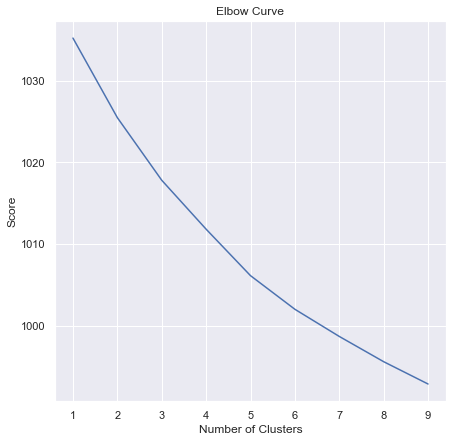

Plotting the Elbow curve took:3.0s 


In [242]:
import seaborn as sns
import time
sns.set(rc= {'figure.figsize': (7,7)})
number_of_clusters = range(1,10)

t0= time.time()
kmeans = [KMeans(n_clusters=i,max_iter=1000,random_state=33,n_jobs=-1) for i in number_of_clusters]
score = [-1*kmeans[i].fit(v1).score(v1) for i in range(len(kmeans))]
t1= time.time()

plt.plot((number_of_clusters),score)
plt.xlabel('Number of Clusters')
plt.xticks(number_of_clusters)
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

print("Plotting the Elbow curve took:{:.1f}s ".format(t1-t0))

توضح الرسمة ان افضل عدد للكلوستر هو مجموعة وحده فالكلوستر مو طريقة زينة لاستخراج العناوين 

### Principal component analysis (PCA)

In [244]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca_result = pca.fit_transform(artic_df) 

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.01230213 0.00907262 0.00793592 0.00648095 0.00564627]


In [245]:
len(pca_result)

1050

## TSNE

In [246]:
tsne_model = TSNE(n_components=2, random_state=0)
results = tsne_model.fit_transform(artic_df) 

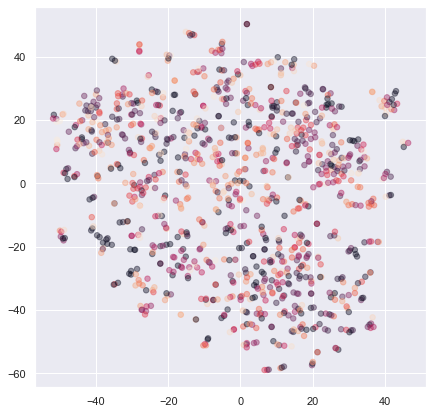

In [248]:
def get_coords(matrix2D):
    x = []
    y = []
    for r in matrix2D:
        x.append(r[0])
        y.append(r[1])
    return x, y

x, y = get_coords(results)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=700, random_state=0).fit(artical_vect) # artical_vect = CountVector resuld

# Scatter plot with colouring by kmeans labels:
plt.scatter(x, y, alpha=0.4, c=kmeans.labels_, marker='o', s=30);